In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
# Membaca Data
data = pd.read_csv('data/seattle-weather.csv')

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


<Axes: >

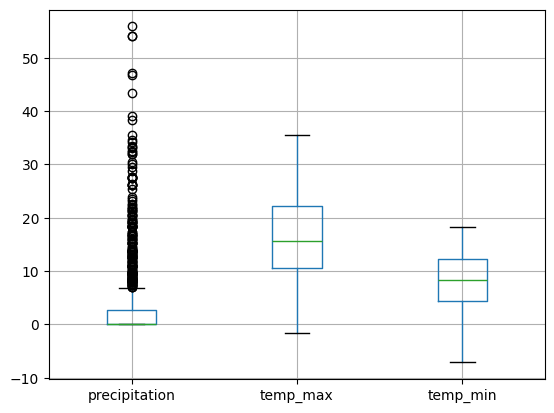

In [3]:
data.boxplot(column=['precipitation', 'temp_max', 'temp_min'])

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
data.shape #Mengecek ukuran dataframe

(1461, 6)

In [19]:
# Menghitung jumlah data masing-masing cuaca pada keseluruhan dataset
print("Jumlah data masing-masing cuaca (keseluruhan dataset):")
print(data['weather'].value_counts())

# Menghitung total semua data
total_data = len(data)
print("\nTotal jumlah data:", total_data)

Jumlah data masing-masing cuaca (keseluruhan dataset):
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

Total jumlah data: 1461


In [11]:
# Memilih Fitur dan Target
features = data[['precipitation', 'temp_max', 'temp_min', 'wind']].values
target = data['weather'].values

In [12]:
#  Encoding Target
le = LabelEncoder()
target_encoded = le.fit_transform(target)

In [13]:
#  Normalisasi Fitur
features_scaled = MinMaxScaler().fit_transform(features)

In [14]:
# Membagi Data Menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_encoded, test_size=0.2, random_state=42)

In [15]:
# Menghitung jumlah data masing-masing cuaca di set pelatihan (training)
print("\nJumlah data masing-masing cuaca di set pelatihan (training):")
unique_train, counts_train = np.unique(y_train, return_counts=True)
train_counts = dict(zip(le.inverse_transform(unique_train), counts_train))
print(train_counts)


Jumlah data masing-masing cuaca di set pelatihan (training):
{'drizzle': 44, 'fog': 76, 'rain': 521, 'snow': 18, 'sun': 509}


In [16]:
# Menghitung jumlah data masing-masing cuaca di set pengujian (testing)
print("\nJumlah data masing-masing cuaca di set pengujian (testing):")
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_counts = dict(zip(le.inverse_transform(unique_test), counts_test))
print(test_counts)


Jumlah data masing-masing cuaca di set pengujian (testing):
{'drizzle': 9, 'fog': 25, 'rain': 120, 'snow': 8, 'sun': 131}


In [17]:
# Menghitung total data pelatihan dan pengujian
print("\nTotal jumlah data pelatihan (training):", len(X_train))
print("Total jumlah data pengujian (testing):", len(X_test))


Total jumlah data pelatihan (training): 1168
Total jumlah data pengujian (testing): 293


In [21]:
# Mengubah Bentuk Data untuk RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [50]:
# Membangun Model RNN
model = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout untuk mengurangi overfitting
    SimpleRNN(50),
    Dropout(0.2),
    Dense(5, activation='softmax')  # 5 kelas untuk kondisi cuaca
])

In [51]:
# Mengompilasi Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Epoch 1/200
19/19 [==============================] - 2s 17ms/step - loss: 1.3566 - accuracy: 0.4247 - val_loss: 1.1317 - val_accuracy: 0.6041
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 1.0718 - accuracy: 0.5411 - val_loss: 1.0452 - val_accuracy: 0.6587
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 1.0110 - accuracy: 0.6310 - val_loss: 1.0024 - val_accuracy: 0.6894
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 0.9753 - accuracy: 0.6455 - val_loss: 0.9534 - val_accuracy: 0.6928
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 0.9321 - accuracy: 0.6618 - val_loss: 0.9207 - val_accuracy: 0.6928
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 0.8941 - accuracy: 0.6986 - val_loss: 0.8881 - val_accuracy: 0.6997
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8752 - accuracy: 0.6935 - val_loss: 0.8625 - val_accuracy: 0.7031
Epoch 8/200


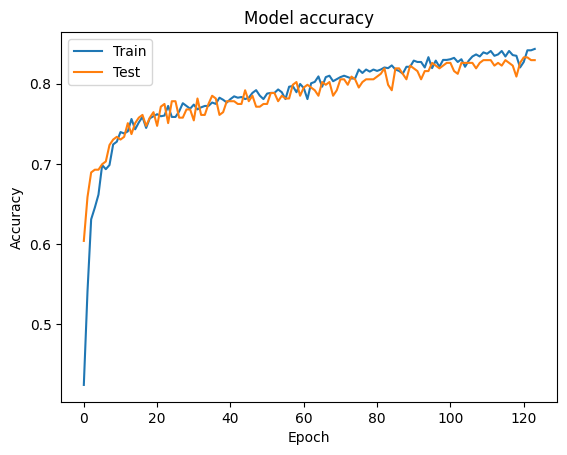

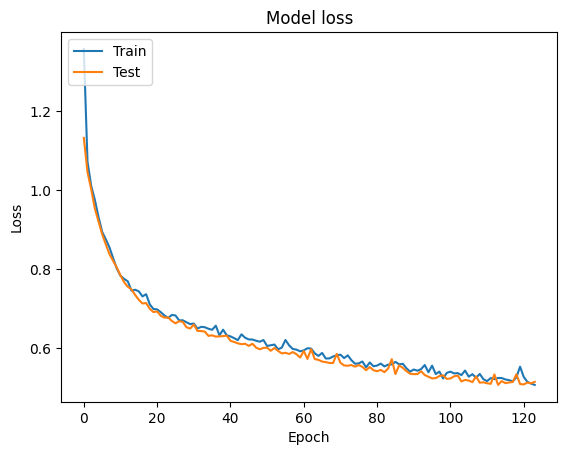

In [53]:
# Melatih Model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

10/10 [==============================] - 0s 2ms/step - loss: 0.5072 - accuracy: 0.8259
Accuracy: 82.59%


In [27]:
# Prediksi dan Menghitung F1 Score
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

10/10 [==============================] - 0s 1ms/step


In [28]:
# Mengonversi Kembali Kelas ke Label Asli
predicted_weather = le.inverse_transform(predicted_classes)

In [29]:
# Menghitung F1 Score
f1 = f1_score(y_test, predicted_classes, average=None)  # F1 score untuk setiap kelas
print("F1 Scores untuk masing-masing kondisi cuaca:")
for weather, score in zip(le.classes_, f1):
    print(f"{weather}: {score:.2f}")

F1 Scores untuk masing-masing kondisi cuaca:
drizzle: 0.00
fog: 0.00
rain: 0.94
snow: 0.22
sun: 0.86


In [30]:
# Menampilkan Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, predicted_classes, target_names=le.classes_))


Laporan Klasifikasi:
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.00      0.00      0.00        25
        rain       0.94      0.93      0.94       120
        snow       1.00      0.12      0.22         8
         sun       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.54      0.41      0.40       293
weighted avg       0.75      0.83      0.78       293



c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

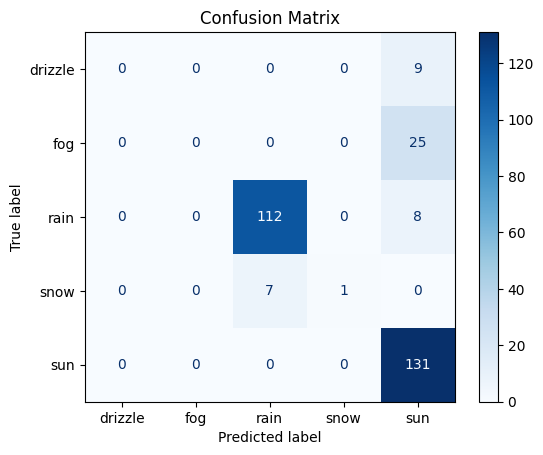

In [31]:
# Menampilkan Confusion Matrix
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [32]:
#  Contoh Prediksi
sample_indices = np.random.randint(0, X_test.shape[0], 10)  # Mengambil 10 prediksi acak
for index in sample_indices:
    print(f'Predicted: {predicted_weather[index]}, Actual: {le.inverse_transform([y_test[index]])[0]}')


Predicted: sun, Actual: sun
Predicted: rain, Actual: rain
Predicted: sun, Actual: sun
Predicted: rain, Actual: rain
Predicted: sun, Actual: fog
Predicted: rain, Actual: rain
Predicted: sun, Actual: sun
Predicted: rain, Actual: rain
Predicted: sun, Actual: sun
Predicted: sun, Actual: fog


In [55]:
# Menghitung prediksi benar dan salah dari hasil prediksi
correct_predictions = np.sum(predicted_classes == y_test)
incorrect_predictions = len(y_test) - correct_predictions

print(f"\nCorrect Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")


Correct Predictions: 244
Incorrect Predictions: 49


Dari 293 data uji, Sebanyak 244 sampel dari set pengujian memiliki label yang diprediksi oleh model sesuai dengan label asli, dan Sebanyak 49 sampel dari set pengujian memiliki label yang diprediksi oleh model tidak sesuai dengan label asli